<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL-project on Movies relational database
---

A relational database, also called Relational Database Management System (RDBMS) or SQL database, stores data in tables and rows also referred to as records. The most popular relational databases are Microsoft SQL Server, Oracle Database, MySQL and IBM DB2. A relational database works by linking information from multiple tables through the use of “keys.” A key is a unique identifier which can be assigned to a row of data contained within a table.  The connection between the various keys between tables then creates the  “relationship” between records contained across multiple tables. The primary benefit of the relational database approach is the ability to create meaningful information by joining the tables.

SQL or Structured Query Languange is used to communicate with a database. SQL statements are used to perform tasks such as update data on a database, or retrieve data from a database.

##Using SQL in Python
In this project I will use Python SQL library, mysql.connector to 

* connect to the IMDb movies database and run the queries.
* reading data from across the tables in the movies database into one table that can be analysed with statistical tools in pandas.
* Do a few useful analyses and visualisation with the movies dataframe in pandas.


##SQL Libraries in Python

There are a number of varieties of SQL (Oracle SQL, mySQL, postgreSQL, etc) databases. Each has slight differences in the language used to interrogate databases.

One of the python SQL libraries, mysql.connector, will be used for this particular project.

Before proceeding further, first let's install the mysql.connector library.

In [ ]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

     |████████████████████████████████| 11.9 MB 21.8 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=f4bb334a8e79d7978da1744a9a28183603eb2389907819de5adc4fde6564d688
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


##About the Data
---
IMDb (Internet Movie Database) is one of the most recognized names for its comprehensive online database collection of movies, films, TV series and so on. As of today (July 2020), you’ll see through the following data pull that IMDb database has approximately 7 million titles. IMDb has made essential susbsets of its database available for non-commercial use of the public. For this project, we will be using the IMDb dataset from Imdb_ijs (by Janez Kranjc).

https://relational.fit.cvut.cz/dataset/IMDb

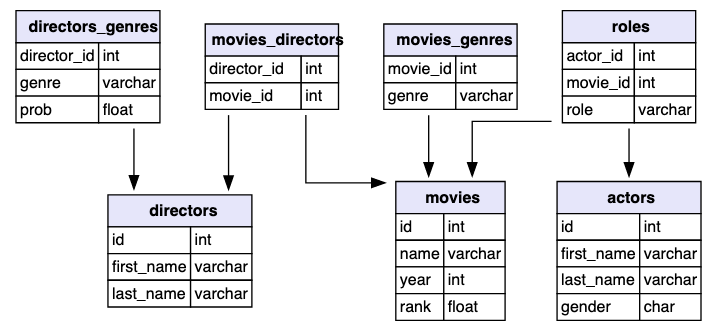

Before loading the dataset into pandas or use the functions of the mysql.connector let's import mysql.connector.

MySQL provides standards-based drivers for JDBC, ODBC, and .Net enabling developers to build database applications in their language of choice - in this ase Python.

In [ ]:
import mysql.connector

##Reading SQL database into python
---
1. Let's load the IMDB database using the location of the database which is as follows:
```
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"
  ```

This is done using cursor method in Python. Cursor() class allows Python code to execute mySQL command in a database session.

In [ ]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

# add a function below here to execute a query (see above for code)
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None

Now that we have the tables, let's

* Run a query to get a count of rows
* Show the tables in the database
* Print the number of records in each of the tables

To make sure that the dataset is not empty!

In [ ]:
def count_query(table_name):
  query3 = "SELECT COUNT(*) FROM " +table_name
  result = execute_query(query3)[0][0]
  return result

# run a query using the execute query function
query = "SHOW TABLES"
tables_imdb = execute_query(query)
print(tables_imdb)
for x in tables_imdb:
  table_name = x[:][0]
  tot_count = count_query(table_name)
  print("The number of records in ", table_name, " is ", tot_count)

[('actors',), ('directors',), ('directors_genres',), ('movies',), ('movies_directors',), ('movies_genres',), ('roles',)]
The number of records in  actors  is  817718
The number of records in  directors  is  86880
The number of records in  directors_genres  is  156562
The number of records in  movies  is  388269
The number of records in  movies_directors  is  371180
The number of records in  movies_genres  is  395119
The number of records in  roles  is  3431966


##Read the movies dataset using an SQL query into a pandas dataframe 
---
To read SQL query into a pandas dataframe we can use pd.read_sql_query(), giving it the query and the database.


Before we can use SQL query to get the dataset into pandas dataframe, we will need to import pandas. We also will need to import files from google.colab so we can download the dataframe into csv file for future use.

In [ ]:
import pandas as pd
from google.colab import files

Let's use read.sql_query now and download the dataset as movies.csv to be used later. 

In [ ]:
def get_movies_data():
  query = """
    SELECT first_name, last_name, name, year, rank, genre 
    FROM directors, movies, movies_genres, movies_directors 
    WHERE movies.id = movies_directors.movie_id 
    AND movies.id = movies_genres.movie_id 
    AND directors.id = movies_directors.director_id
  """
  df = pd.read_sql_query(query, mydb)
  df. to_csv('movies.csv')
  files.download('movies.csv')
  return df

Let's check to see if movies_df has been successfully downloaded.

In [ ]:
# This code will test if movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


## Inspect the dataset 
---
First let's look at what the dataframe looks like. Let's upload the movies.csv file- a copy of which is saved in https://github.com/JaySanthanam/Programming-for-data/tree/main/Datasets

We will then inspect the dataset 

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns

def get_data():
  !rm movies.csv
  # upload a set of chosen files then read a specified file
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
  return df 

mov_data = get_data()


Saving movies.csv to movies.csv


Get some simple stats

In [ ]:
print(mov_data.describe())

          Unnamed: 0           year           rank
count  368894.000000  368894.000000  113376.000000
mean   184446.500000    1969.442222       5.995124
std    106490.669438      29.082051       1.540330
min         0.000000    1888.000000       1.000000
25%     92223.250000    1947.000000       5.100000
50%    184446.500000    1976.000000       6.200000
75%    276669.750000    1996.000000       7.100000
max    368893.000000    2007.000000       9.900000


Technical summary

In [ ]:
print(mov_data.info()) # get technical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None


### Clean, format and sort the dataset 
---
Looks like we have some null values. What about duplicates? Let's check for those and drop any duplicate entries.

In [ ]:
mov_df = mov_data.drop_duplicates()
print(mov_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB
None


Only the rank column has null values. Let's drop all null values but rename the dataframe so that we can always get access to the original dataframe when we need to work with columns other than rank. The new dataframe is mov_df_rank. This mov_df_rank dataframe will be used whenever we need to explore movie rankings. Otherwise, we will continue using mov_df for our analyses so we do not lose any information unneccesarily. 

In [ ]:
mov_df_rank = mov_df.dropna()
print(mov_df_rank.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB
None


The director names are separated as first and last names. So let's modify the dataframe to join their first and last name to one column - director_name

In [ ]:
mov_df['director_name'] = mov_df['first_name']+' ' + mov_df['last_name']
mov_df =mov_df.drop(columns=['first_name', 'last_name'])

Check to see if this worked.

In [ ]:
print(mov_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     368894 non-null  int64  
 1   name           368894 non-null  object 
 2   year           368894 non-null  int64  
 3   rank           113376 non-null  float64
 4   genre          368894 non-null  object 
 5   director_name  368894 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ MB
None


Now we have a dataframe with no null values and let's look at bi-variate scatter plot. But, this time, the plot is not for looking at correlation between variables (in this case the columns). We are rather going to use it get an idea of the number of movies by the genre and titles released by year. 

<Figure size 1080x576 with 0 Axes>

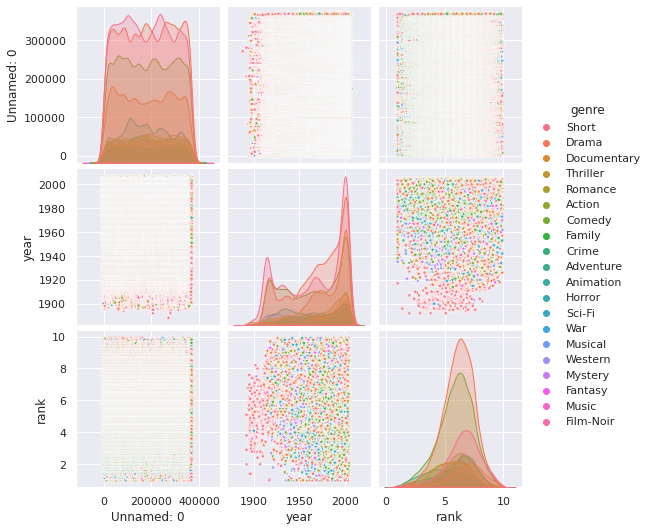

In [ ]:
sns.set_palette('husl',8) # got this from https://seaborn.pydata.org/tutorial/color_palettes.html
plt.figure(figsize = (15,8))
bi_var_plot = sns.pairplot(mov_df,hue="genre",diag_kind="kde", markers='*'); #Using markers and pair plotting from https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style("darkgrid")
plt.show()

### Movie Details
---
One of the things that most people would be interested in is finding out all the details of a movie by it's title. For example, who is the director of the movie "Kill Bill" and it's genre, rating and year of release. Below is a function that retrieves such an information based on movie name.

In [ ]:
def get_movie_details(df, title):
  exists = mov_df['name'].str.contains(title).any()
  if exists == False:
    print("Movie title not found")
    return 0
  elif exists == True:
    df = df.set_index('name')
    result = df.loc[title]
    print("Details of the movie", title)
    print(result)
    return 0
  else:
    return 99


actual = get_movie_details(mov_df,"Nudo e selvaggio")
#Test if the function works well for any title
print("\n\nTesting the movie detail function")
expected = 0
if actual == expected:
  print("Function works well")
else:
  print("Expected", expected, "but got", actual)


Details of the movie Nudo e selvaggio
                  Unnamed: 0  year  rank      genre              director_name
name                                                                          
Nudo e selvaggio      328544  1985   5.0     Action  Michele Massimo Tarantini
Nudo e selvaggio      328545  1985   5.0  Adventure  Michele Massimo Tarantini


Testing the movie detail function
Function works well


### Movies by specific director
Another things people might want to know is what movies were directed by a particular director. The code below retrieves that information.

In [ ]:
def get_director_movies(df,dir_name):
  movies_list = df[df['director_name']== dir_name]
  return movies_list

movies = get_director_movies(mov_df,"Quentin Tarantino")
movies_list = movies["name"]
print(movies_list)


328559                   Four Rooms
328560                   Four Rooms
328561          Inglorious Bastards
328562          Inglorious Bastards
328563          Inglorious Bastards
328564                 Jackie Brown
328565                 Jackie Brown
328566                 Jackie Brown
328567            Kill Bill: Vol. 1
328568            Kill Bill: Vol. 1
328569            Kill Bill: Vol. 1
328570            Kill Bill: Vol. 2
328571            Kill Bill: Vol. 2
328572            Kill Bill: Vol. 2
328573            Kill Bill: Vol. 2
328574    My Best Friend's Birthday
328575    My Best Friend's Birthday
328576                 Pulp Fiction
328577                 Pulp Fiction
328578               Reservoir Dogs
328579               Reservoir Dogs
328580               Reservoir Dogs
328581               Reservoir Dogs
Name: name, dtype: object


### Movies released in a specific year
How about movies released in a specific year? Below is a function that will give us a list of movies in a specific user input year.

In [ ]:
def get_year_movies(df,year):
  movies_list = df[df['year']== year]
  return movies_list

year = int(input("Choose a year between 1888 to 2007: "))
if year<2008 and year>1887:
  movies_by_year = get_year_movies(mov_df,year)
  year_count = movies_by_year['year'].count()
  movies_year_list = movies_by_year["name"]
  print("\n\nThere were", year_count, "movies released in the year", year, "and they are:\n\n")
  print(movies_year_list)
else:
  print("Invalid year")

Choose a year between 1888 to 2007: 2000


There were 11346 movies released in the year 2000 and they are:


90                                                  22
91                                                  22
92                                 Highlander: Endgame
93                                 Highlander: Endgame
137       Mejor de cada casa (una semana en el parque)
                              ...                     
368616                                Kasei no waga ya
368617                                Kasei no waga ya
368659                                        Gle, gle
368660                                        Gle, gle
368793                      Zirkus Nemo - Nu med neger
Name: name, Length: 11346, dtype: object


We could write a function to find list of movies of specific genre, but, that will be a long list. Instead it will be useful to look at each column.

### Explore each column of the dataframe
---
Starting with movie genre coulumn,

1. What are the different movie genres?
2. Which genre of movies is most liked by people (ranked higher)?

#### 1. What are the different movie genres?

In [ ]:
genres = mov_df['genre'].value_counts()
print(genres)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


Let's visualise the above result using seaborn.

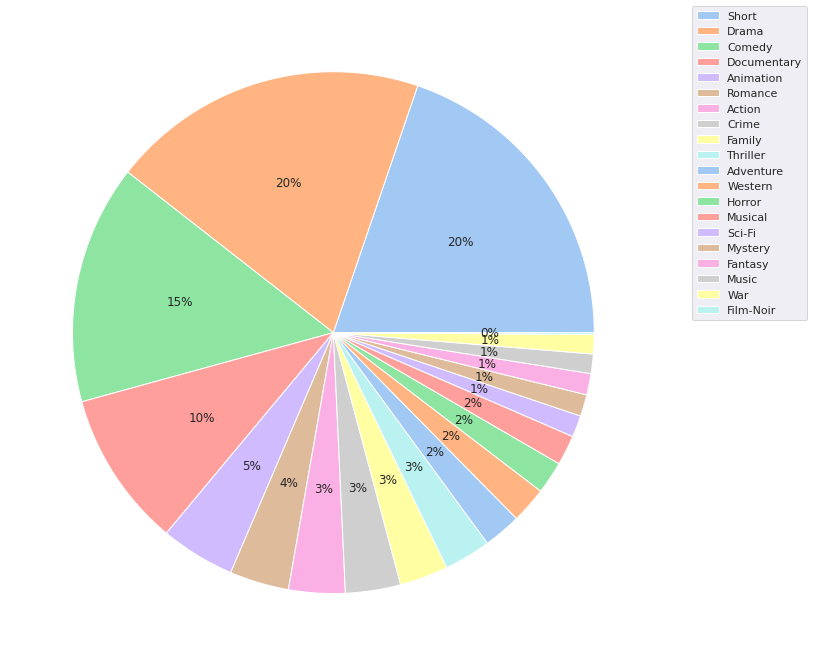

In [ ]:
def do_pie_plot(x,y):
  plt.figure(figsize = (15,12))
  sns.set(style="darkgrid")
  colors = sns.color_palette('pastel')
  plt.pie(y, colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return

x = genres.keys()
y = genres
do_pie_plot(x,y)

Clearly, the most number of movies are from the genres short and drama followed by comedy.

#### 2.Which genre/s has higher rank than the rest? 

In [ ]:
rank_by_genre = mov_df_rank.groupby('genre')['rank'].mean()
print(rank_by_genre)

genre
Action         5.365895
Adventure      5.619379
Animation      6.553628
Comedy         5.923196
Crime          5.861007
Documentary    6.659544
Drama          6.146169
Family         6.323344
Fantasy        5.882289
Film-Noir      6.702892
Horror         4.738325
Music          6.458921
Musical        6.109916
Mystery        5.941501
Romance        6.171457
Sci-Fi         5.015858
Short          6.533778
Thriller       5.522776
War            6.430539
Western        5.665567
Name: rank, dtype: float64


Let's use a bar chart to visualise this.

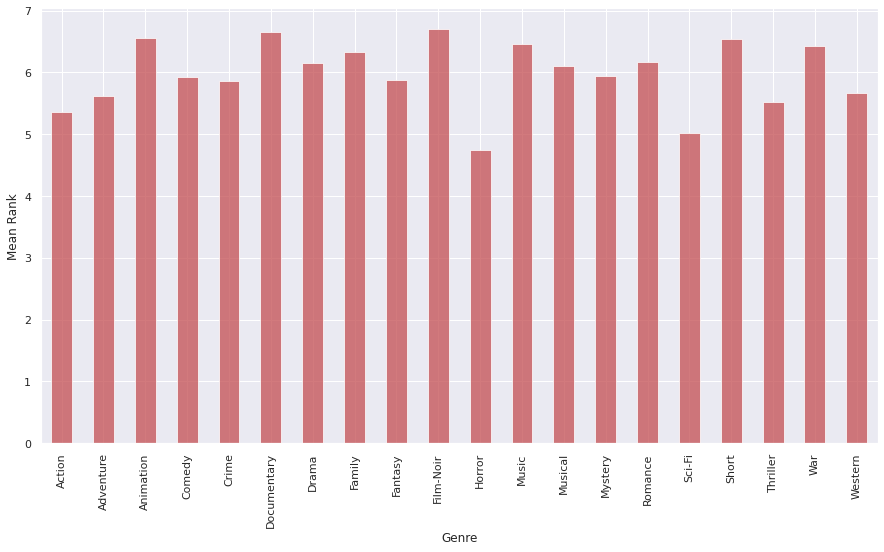

In [ ]:
def do_bar_plot(x,y):
  plt.figure(figsize = (15,8))
  bar_plot = y.plot(x=x, y=y, kind="bar", alpha=0.75, rot=90, color = 'r')
  bar_plot.set_xlabel("Genre")
  bar_plot.set_ylabel("Mean Rank")
  plt.show()
  return 

x = rank_by_genre.keys()
y = rank_by_genre
do_bar_plot(x,y)

The average rank by genre is pretty even, with the top 5 genres in ranking:
  * animation
  * documentary 
  * Film-noir
  * short films 
  * war

### Movie rank
---
Let's explore the rank column next.
1. How many movies have ranks of over 9?
2. What is the average/mean rank for each year?
  * Has it been increasing or decreasing over the years
3. What is the median rank for each year 
  * How does this compare to the mean each year?

Many movie names are repeated by genre. So, it makes sense to remove duplicates in name so there are no double counting in ranks.

In [ ]:
mov_no_dup = mov_df_rank.drop_duplicates('name')

###1. How many movies have ranks over 9?

In [ ]:
high_rank = mov_no_dup[mov_no_dup['rank'] > 9.0].count()
high_rank[0]

806

###2. Mean Rank for each year 

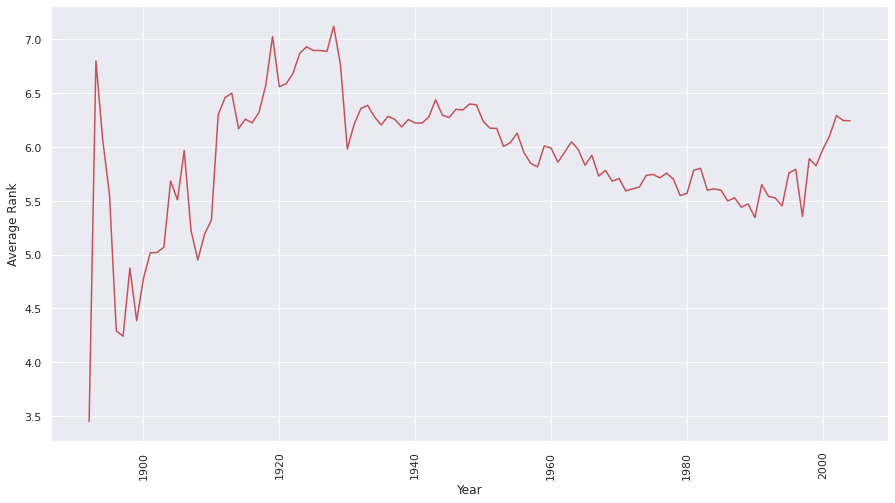

In [ ]:
def do_line_plot(y, x_label,y_label):
  plt.figure(figsize = (15,8))
  line_plot = y.plot(x="year", y=y, kind="line", alpha=0.98, rot=90, color = 'r')
  line_plot.set(xlabel=x_label, ylabel=y_label)
  plt.show()
  return

rank_mean_year = mov_no_dup.groupby('year')['rank'].mean()
do_line_plot(rank_mean_year,"Year","Average Rank")

###3. Median rank for each year

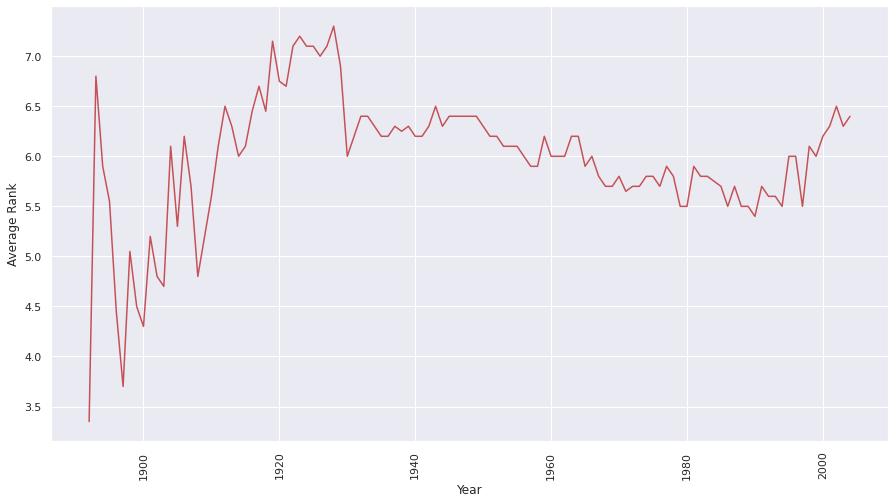

In [ ]:
rank_median_year = mov_no_dup.groupby('year')['rank'].median()
do_line_plot(rank_median_year,"Year","Average Rank")

#### How does median compare to the mean each year?

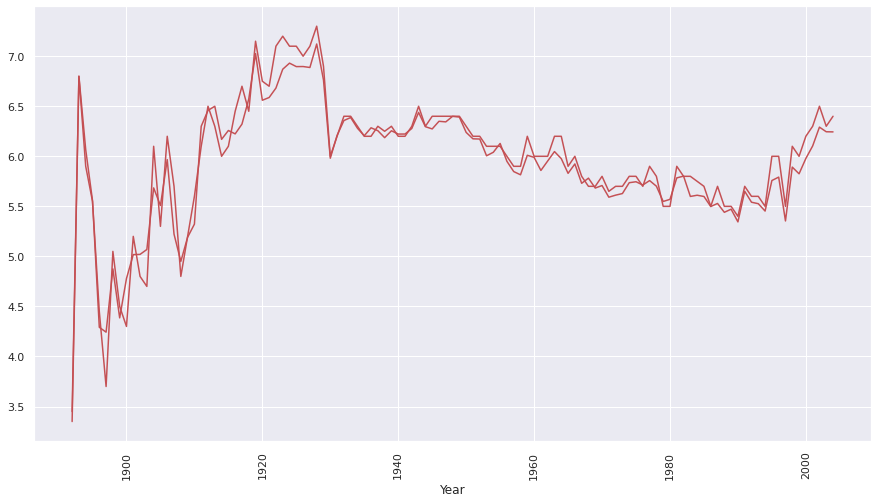

In [ ]:
def do_line_plot(y1,y2, x_label):
  plt.figure(figsize = (15,8))
  line_plot = y1.plot(x="year", y=y1, kind="line", alpha=0.98, rot=90, color = 'r')
  line_plot.set(xlabel=x_label)
  line_plot = y2.plot(x="year", y=y2, kind="line", alpha=0.98, rot=90, color = 'r')
  line_plot.set(xlabel=x_label)
  plt.show()
  return

do_line_plot(rank_mean_year,rank_median_year, "Year")

From the above plot, we can see the years when there are more movies with high rating compared to lower ratings.

### Movies and release year
---
One might be interested in doing more with a specific year. For example, number of movies released before and after that year. Next let's look at total number of movies in a year group
1.  Latest and oldest movies - movies after and before a certain release year.

  1.1 e.g. before 2000 

  1.2 e.g. In 2000 or after 

2.  List of Movies by specific director.
3.  Plot the total number of movies released by year.

####Task 1.1: Oldest movies - movies released before 2000

Find movies released before a specific user input year - here 2000.

In [ ]:
def get_oldies_number(year):
  oldies = mov_no_dup[mov_no_dup['year']< year].count()
  return oldies[0]

year = int(input("Enter a cut-off year: "))
if year < 2007:
  oldies_number = get_oldies_number(year)
  print("The total number of movies released before", year, "is", oldies_number)
else:
  print("Enter a year before 2007")

Enter a cut-off year: 2000
The total number of movies released before 2000 is 46170


####Task 1.2: Newer movies 
movies released in or after a user specified year

In [ ]:
def get_new_number(year):
  new_mov = mov_no_dup[mov_no_dup['year']>= year].count()
  return new_mov[0]

year = int(input("Enter a cut-off year: "))
if year > 1888:
  new_number = get_new_number(year)
  print("The total number of movies released after or in the", year, "is", new_number)
else:
  print("Enter a year after 1888")


Enter a cut-off year: 2000
The total number of movies released after or in the 2000 is 9784


####Task 3: Total number of movies by year
Which year has the highest number of movie releases?

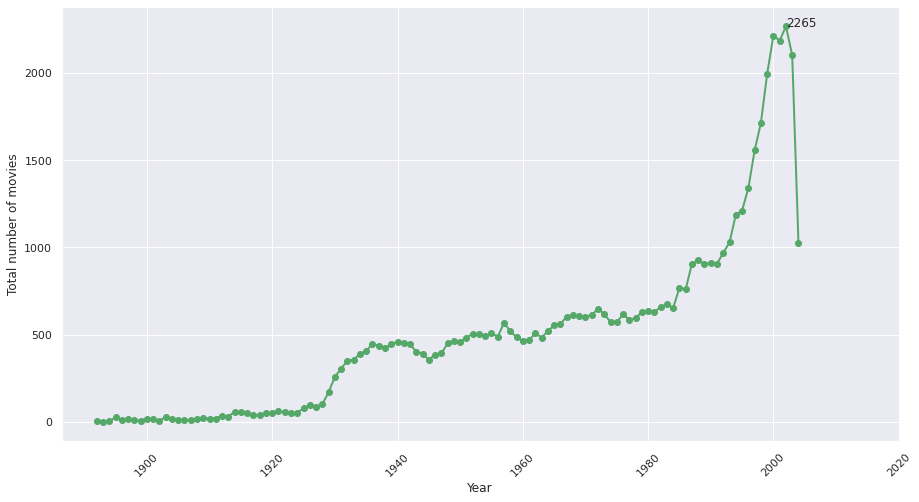

In [ ]:
import matplotlib.ticker as ticker

def do_lineplot_with_ticks(x,y,x_label,y_label,ticks,max_val,label1):
  plt.figure(figsize = (15,8))  # fix the plot size large enough to see the years clearly
  plt.plot(year, movie_year, 'go-', linewidth =2) # plot green line with dots
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(year)
  plt.xticks(ticks, rotation=45) # add specified tick labels to the x-axis
  plt.grid() # show axes grid to better visuals
  ax = plt.gca()
  ax.annotate(label1, xy=(2002,max_val)) # annotate the maximum value
  plt.grid()
  plt.show()
  return

movie_by_year = mov_no_dup.groupby('year')["name"].count()
year = np.array(movie_by_year.keys())
movie_year = np.array(list(movie_by_year))
max_val = mov_no_dup.groupby('year')["name"].count().max() # find the maximum 
label1 = "{:.0f}".format(max_val)
do_lineplot_with_ticks(year,movie_year,"Year","Total number of movies",[1900, 1920, 1940, 1960, 1980, 2000, 2020],max_val,label1)

The above plot shows that in the year 2002 there were 2265 movie releases which is the highest number of movies per year in the database.

### Which director has the highest ranked movies?
---

A director who has done more movies will have different average (lower or higher dpending on the ratings) compared to someone who is done only 1 movie. Same holds for any single aggregate we try use. So it is best to use more than one aggregate to identify the director of top ranking movies. If the median rank is higher than mean rank then that means the director has made more high ranking movies than low ranking one. So, using this idea,  
 
####the selection criteria for director with highest ranking movies is:
The director should have made more than 1 movie and their median rank should be larger than mean rank.

In [ ]:
def find_top_director(df):
  dir_rank = df.groupby(['director_name'])['rank'].max()
  dir_ave = df.groupby(['director_name'])['rank'].mean()
  dir_med = df.groupby(['director_name'])['rank'].median()
  dir_count = df.groupby(['director_name'])['rank'].count()
  index  = dir_rank.keys()
  rank = list(dir_rank)
  ave = list(dir_ave)
  median = list(dir_med)
  count = list(dir_count)
  d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
  return d

my_dict = find_top_director(mov_df)
top_dir = pd.DataFrame(data=my_dict)
dir_toprank = top_dir.sort_values(["count", "median_rank"],ascending = (False, False))
top_10_dir = dir_toprank.head(10)
print("Top 10 directors are:")
print(top_10_dir)

Top 10 directors are:
                dir_name  max_rank  mean_rank  median_rank  count
19007       Friz Freleng       8.4   6.718341          6.8   1025
10208    Chuck (I) Jones       9.0   6.944614          7.0    984
12207     Dave Fleischer       9.5   5.974526          5.9    738
51637    Robert McKimson       8.3   6.475897          6.5    697
58224          Tex Avery       8.9   7.029077          6.9    509
62259  William (I) Hanna       8.8   6.518496          6.6    492
30965     Joseph Barbera       8.8   6.538763          6.6    485
51426    Robert Clampett       9.1   7.181212          7.1    330
25480        Jack Kinney       8.7   6.591829          6.5    257
25371    Jack (I) Hannah       9.0   6.932016          6.9    253


The above gives a list of first 10 directors with median rank above mean rank. Thus according to the selection strategy specified above, they are the top 10 directors of high ranking movies.

So, based on the selection criteria, the director who has consistent results is Friz Freleng. What are the movies he has made?

In [ ]:
movies = get_director_movies(mov_df,"Friz Freleng")
movies_list = movies['name']
print(movies_list)

112399               14 Carrot Rabbit
112400               14 Carrot Rabbit
112401               14 Carrot Rabbit
112402               14 Carrot Rabbit
112403                Ain't She Tweet
                     ...             
113549            Yankee Doodle Daffy
113550    You Ought to Be in Pictures
113551    You Ought to Be in Pictures
113552    You Ought to Be in Pictures
113553    You Ought to Be in Pictures
Name: name, Length: 1155, dtype: object


Friz Freleng has mostly done animation and/or family comedy movies. 

What about Chuck (I) Jones?

In [ ]:
movies = get_director_movies(mov_df,"Chuck (I) Jones")
movies_list = movies['name']
print(movies_list)

166569        8 Ball Bunny
166570        8 Ball Bunny
166571        8 Ball Bunny
166572        8 Ball Bunny
166573    90 Day Wondering
                ...       
167636      Zoom and Bored
167637     Zoom at the Top
167638     Zoom at the Top
167639     Zoom at the Top
167640     Zoom at the Top
Name: name, Length: 1072, dtype: object


Again, Chuck (I) Jones has mainly made animation and family movies.

###Top 10 highly ranked directors based on genre:

I will be keeping the strategy to find highly ranked directors the same, i.e., he/she should have directed more than 1 movie and their median rank should be larger than their average rank.

In [ ]:
def find_top(df, genre):
  df = df.loc[df['genre'] == genre]
  dir_rank = df.groupby(['director_name'])['rank'].max()
  dir_ave = df.groupby(['director_name'])['rank'].mean()
  dir_med = df.groupby(['director_name'])['rank'].median()
  dir_count = df.groupby(['director_name'])['rank'].count()
  index  = dir_rank.keys()
  rank = list(dir_rank)
  ave = list(dir_ave)
  median = list(dir_med)
  count = list(dir_count)
  d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
  top_dir = pd.DataFrame(data=d)
  return top_dir

dir_top = find_top(mov_df,'Animation')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Animation movie directors are:")
print(top_10)

Top 10 Animation movie directors are:
               dir_name  max_rank  mean_rank  median_rank  count
1240       Friz Freleng       8.4   6.691923         6.80    260
692     Chuck (I) Jones       9.0   6.935628         7.00    247
836      Dave Fleischer       9.5   5.970563         5.90    231
3382    Robert McKimson       8.3   6.452273         6.50    176
3879          Tex Avery       8.9   7.027559         6.90    127
4201  William (I) Hanna       8.8   6.491935         6.60    124
2014     Joseph Barbera       8.8   6.513115         6.60    122
3373    Robert Clampett       9.1   7.190000         7.15     80
1673        Jack Kinney       8.7   6.567647         6.50     68
1668    Jack (I) Hannah       9.0   6.938462         6.90     65


We could do the same for other genres, such as, comedy

In [ ]:
dir_top = find_top(mov_df,'Comedy')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Comedy movie directors are:\n")
print(top_10)

Top 10 Comedy movie directors are:

                dir_name  max_rank  mean_rank  median_rank  count
5613        Friz Freleng       8.4   6.736735          6.8    245
2970     Chuck (I) Jones       9.0   6.945299          7.0    234
15195    Robert McKimson       8.3   6.496512          6.5    172
3589      Dave Fleischer       8.1   5.980282          5.9    142
17071          Tex Avery       8.9   7.031746          6.9    126
18309  William (I) Hanna       8.8   6.525000          6.6    120
9305      Joseph Barbera       8.8   6.541176          6.6    119
9608         Jules White       8.5   6.421818          6.6    110
15115    Robert Clampett       9.1   7.167949          7.1     78
2608     Charles Chaplin       8.4   6.750746          6.7     67


Or drama.

In [ ]:
dir_top = find_top(mov_df,'Drama')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Drama movie directors are:\n")
print(top_10)

Top 10 Drama movie directors are:

                 dir_name  max_rank  mean_rank  median_rank  count
4345        D.W. Griffith       8.0   6.303125         6.30     64
15869      Michael Curtiz       8.8   6.344262         6.40     61
11290       John (I) Ford       8.2   6.202000         6.30     50
24240    William Dieterle       7.8   6.206383         6.40     47
24204  William A. Wellman       8.2   6.282222         6.30     45
15724        Mervyn LeRoy       8.1   6.551163         6.50     43
7619         George Cukor       8.1   6.333333         6.50     39
4021   Clarence (I) Brown       8.2   6.547368         6.50     38
10633     Jean-Luc Godard       7.8   6.147368         6.25     38
8995       Henry (I) King       7.6   6.397297         6.40     37


What are some of the movies directed by D. W. Griffith?

In [ ]:
movies = get_director_movies(mov_df,"D.W. Griffith")
movies_list = movies['name']
print(movies_list)

130954                      Abraham Lincoln
130955                      Abraham Lincoln
130956                 Adopted Brother, The
130957    Adventure in the Autumn Woods, An
130958             Adventures of Billy, The
                        ...                
131815         Wreath of Orange Blossoms, A
131816                       Yaqui Cur, The
131817                       Yaqui Cur, The
131818                    Zulu's Heart, The
131819                    Zulu's Heart, The
Name: name, Length: 866, dtype: object


The above analyses shows that using mysql.connector library, we can retreive information held in database tables an duse pandas to clean, sort, manipulate and visualise the data along with getting useful information.

## Movies Project Conclusion
----
I have 
* used mySQL query library mysql.connector to retrieve data from IMDb database and save it into pandas. 
* used my pandas skills to clean, sort, wrangle and manipulate data to extract useful information from the movies data. 
* used seaborn and matlib to do visualisations. 
* come up with a strategy to find the top 10 directors with high ranking movies using aggregates. 
* used numpy to process the only numerical column/series, on rank. 
* made use of user_defined functions for repetitive codes. 
* applied error testing methods wherever possible to test my functions.

## Takeaway for the future:
I feel more confident with using SQL queries in python now. I think I can learn to write more complicated functions to join table names etc to make it easier to retrieve and analyse data from databases.

##What are the worksheets where I learnt the skills used in this project?
---
* SQL query and data retrieval : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/10_1_SQL_databases_worksheet.ipynb
* Data sorting and cleaning : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/3_Sorting_and_cleaning.ipynb
* Wrangle the data : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/4_Wrangle_the_data.ipynb
* Numpy : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/5_numpy.ipynb
* Visualisations with matplotlib : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/7_1_Visualisation_with_matplotlib.ipynb
* Visualisations with seaborn : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/7_2_Visualisation_with_Seaborn.ipynb
* Error testing and handling : https://github.com/JaySanthanam/Programming-for-data/blob/main/Worksheets/13_Error_handling_and_testing.ipynb